# Revenue (ADR) Predictions for Hotels using Machine Learning

1. ARIMA models 
2. Deep Neural Network
3. Sequential Neural Networks

## Dataset

Variable **data2**: Dataset from Kaggle, Look below for more info.



The data is originally from the article [Hotel Booking Demand Datasets](https://www.sciencedirect.com/science/article/pii/S2352340918315191), written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

The data was downloaded and cleaned by Thomas Mock and Antoine Bichat for #TidyTuesday during the week of February 11th, 2020. 

To check more about the dataset, visit the link here: https://www.kaggle.com/jessemostipak/hotel-booking-demand

## 1. ARIMA Model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
plt.rcParams['figure.dpi'] = 100

In [2]:
## Kaggle Dataset
data2 = pd.read_csv('hotel_bookings.csv')
data2.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [3]:
data2.shape

(119390, 32)

In [4]:
data2.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [3]:
target = 'adr'
data2 = data2[[target]]

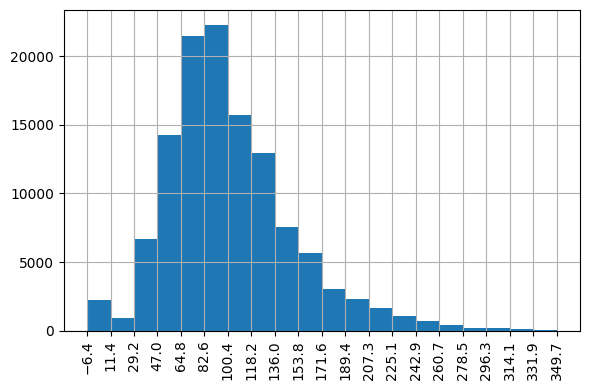

In [35]:
xx = plt.hist(data2[data2<350], bins=20)
plt.xticks(xx[1], rotation=90)
plt.grid()
plt.tight_layout()
plt.savefig("Hist.jpg", dpi=130)
plt.show()

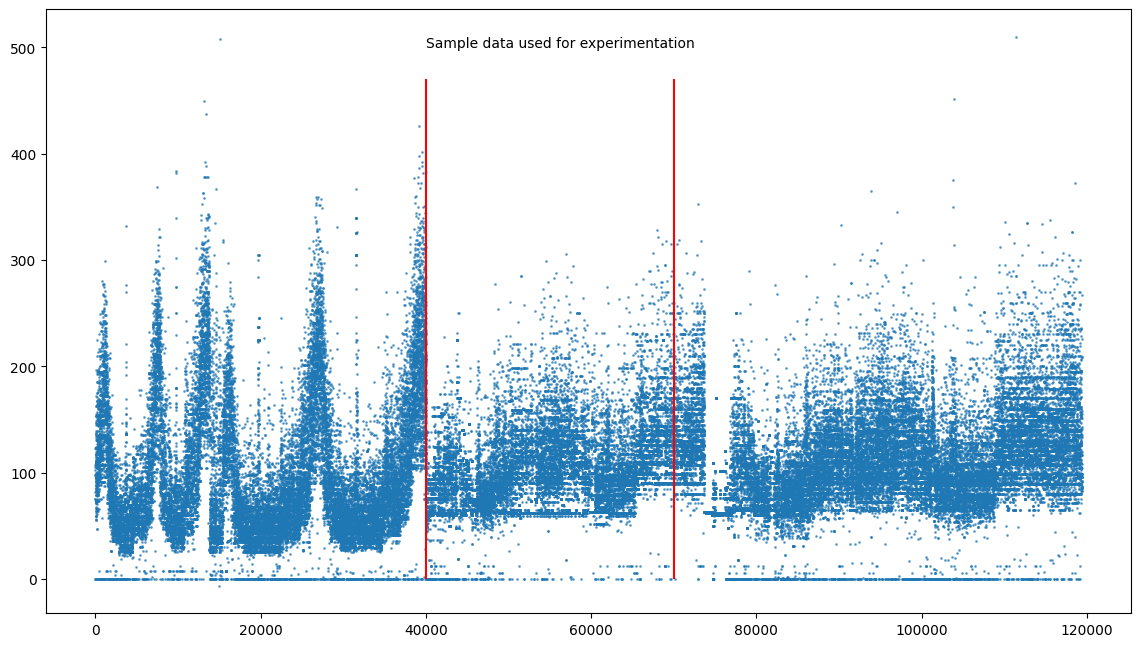

In [37]:
plt.figure(figsize=(14,8))
plt.scatter(range(len(data2[data2.adr<1000]['adr'])),data2[data2.adr<1000]['adr'], s=1, alpha=0.6)
plt.vlines(40000,0, 470, colors='red')
plt.vlines(70000,0, 470, colors='red')
plt.text(40000,500, "Sample data used for experimentation")
plt.savefig("sample_data.jpg", dpi=150)
plt.show()

###  Taking Slice of Data to perform the algorithms and Check if its working!

Slice of the data is taken from inbetween the time series, [40000, 70000)

In [4]:
sample_data = data2[data2.adr < 1000].iloc[40000:70000]
sample_x = range(sample_data.shape[0])
sample_data.head()

adr
40000  135.00
40001  131.40
40002  156.00
40003  116.50
40004  187.19

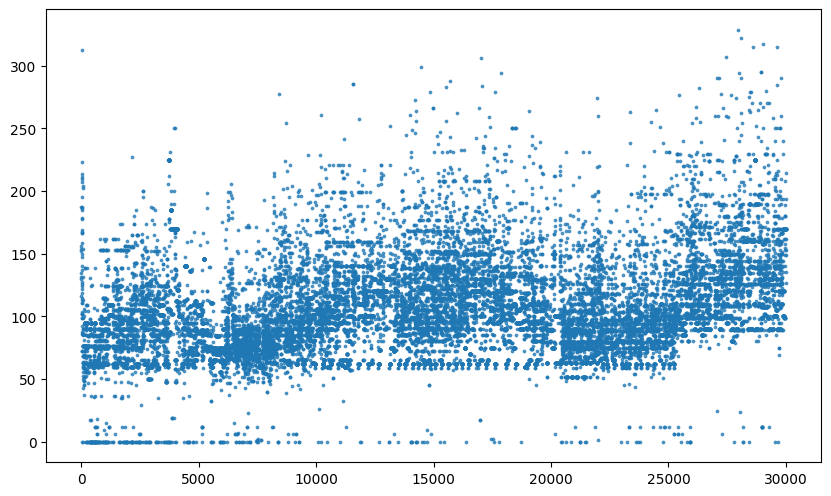

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(sample_x, sample_data.adr, s=3, alpha=0.7)
plt.savefig("sample.jpg", dpi=120)

### Reducing Noise from the Time series data through calculating moving averages (Window size : 7)

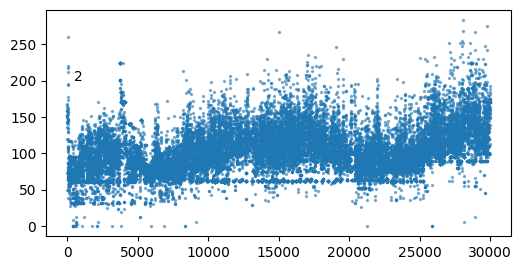

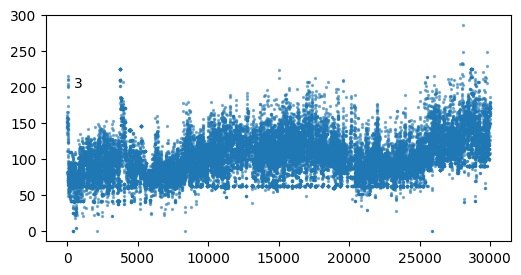

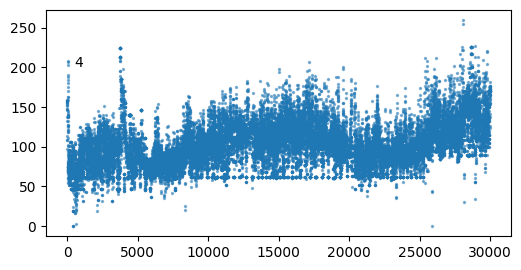

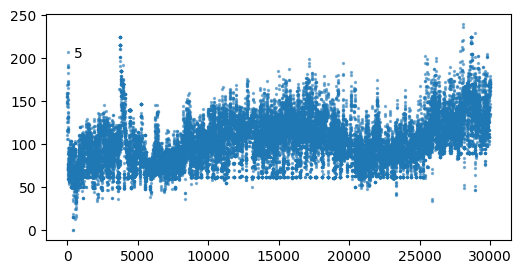

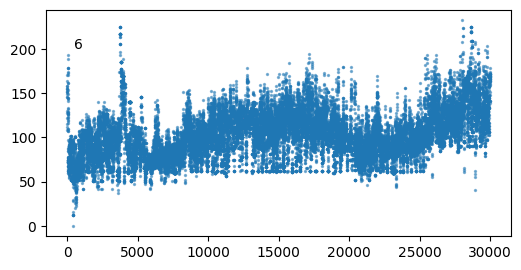

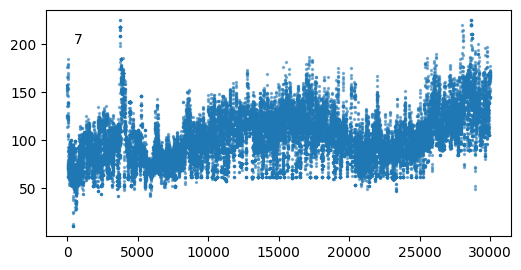

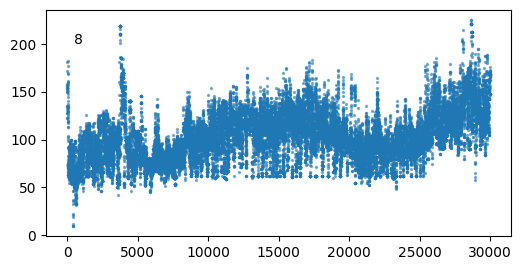

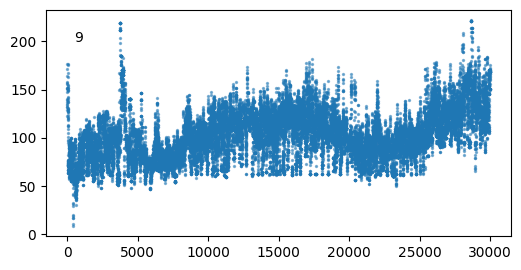

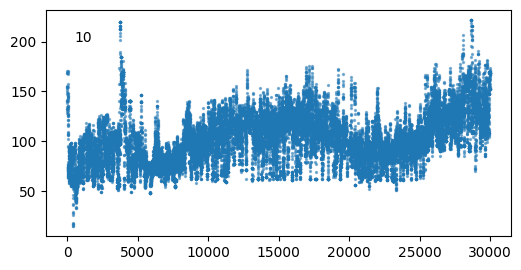

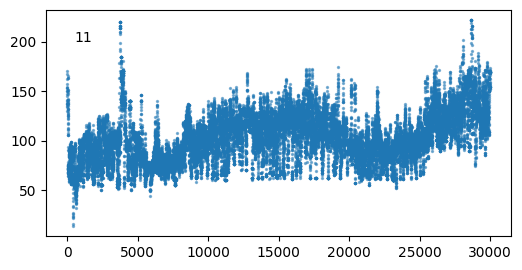

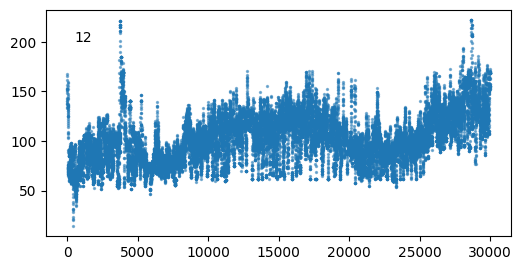

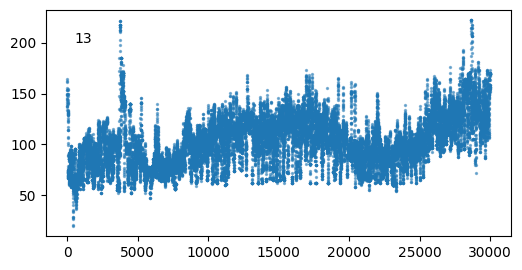

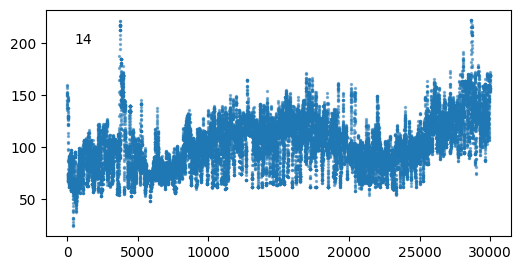

In [42]:
for i in range(2,15):
    mov_avg7 = sample_data.adr.rolling(window=i).mean().iloc[i:]
    mov_avg7 = mov_avg7.reset_index(drop=True)
    plt.figure(figsize=(6,3))
    plt.scatter(range(len(mov_avg7)), mov_avg7, s=2, alpha=0.5)
    plt.text(500,200, str(i))

In [5]:
winsize = 8

In [6]:
mov_avg = sample_data.adr.rolling(window=winsize).mean().iloc[winsize:]

In [7]:
mov_avg = mov_avg.reset_index(drop=True)

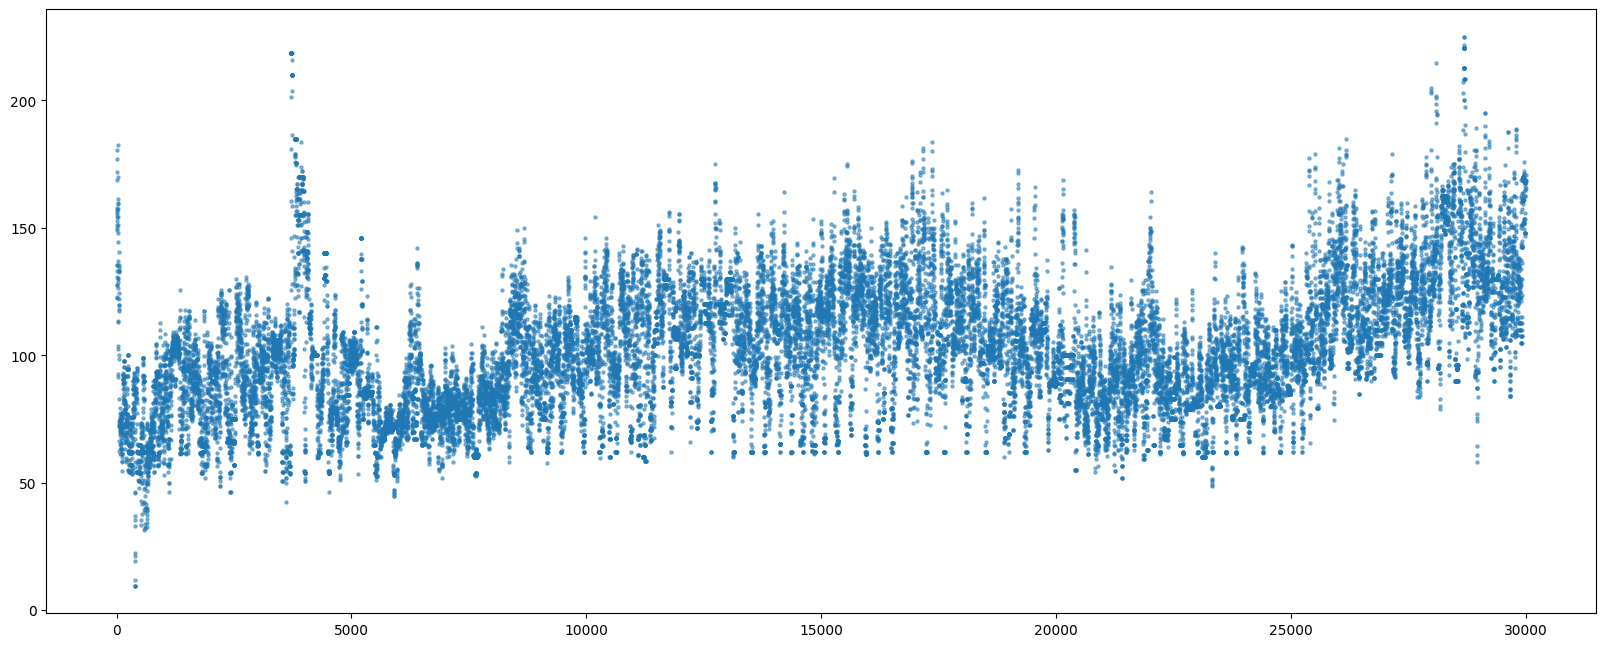

In [46]:
plt.figure(figsize=(20,8))
plt.scatter(range(len(mov_avg)), mov_avg, s=5, alpha=0.5)

In [49]:
model = ARIMA(endog=mov_avg7 ,seasonal_order=(3,0,0,2))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    adr   No. Observations:                29986
Model:              ARIMA(3, 0, 0, 2)   Log Likelihood              -87024.178
Date:                Tue, 22 Mar 2022   AIC                         174058.356
Time:                        13:43:32   BIC                         174099.898
Sample:                             0   HQIC                        174071.685
                              - 29986                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        102.0146      0.978    104.272      0.000     100.097     103.932
ar.S.L2        1.2438      0.005    265.406      0.000       1.235       1.253
ar.S.L4       -0.1689      0.008    -21.817      0.000      -0.184      -0.154
ar.S.L6       -0.1020      0.005    -21.196      0.000      -0.111      -0.093
sigma2        19.4196      0.116    167.830      0.000      19.193      19.646
===================================================================================
Ljung-Box (L1) (Q):                8155.54   Jarque-Bera (JB):              4245.22
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.39   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 30 Days in Future Predictions

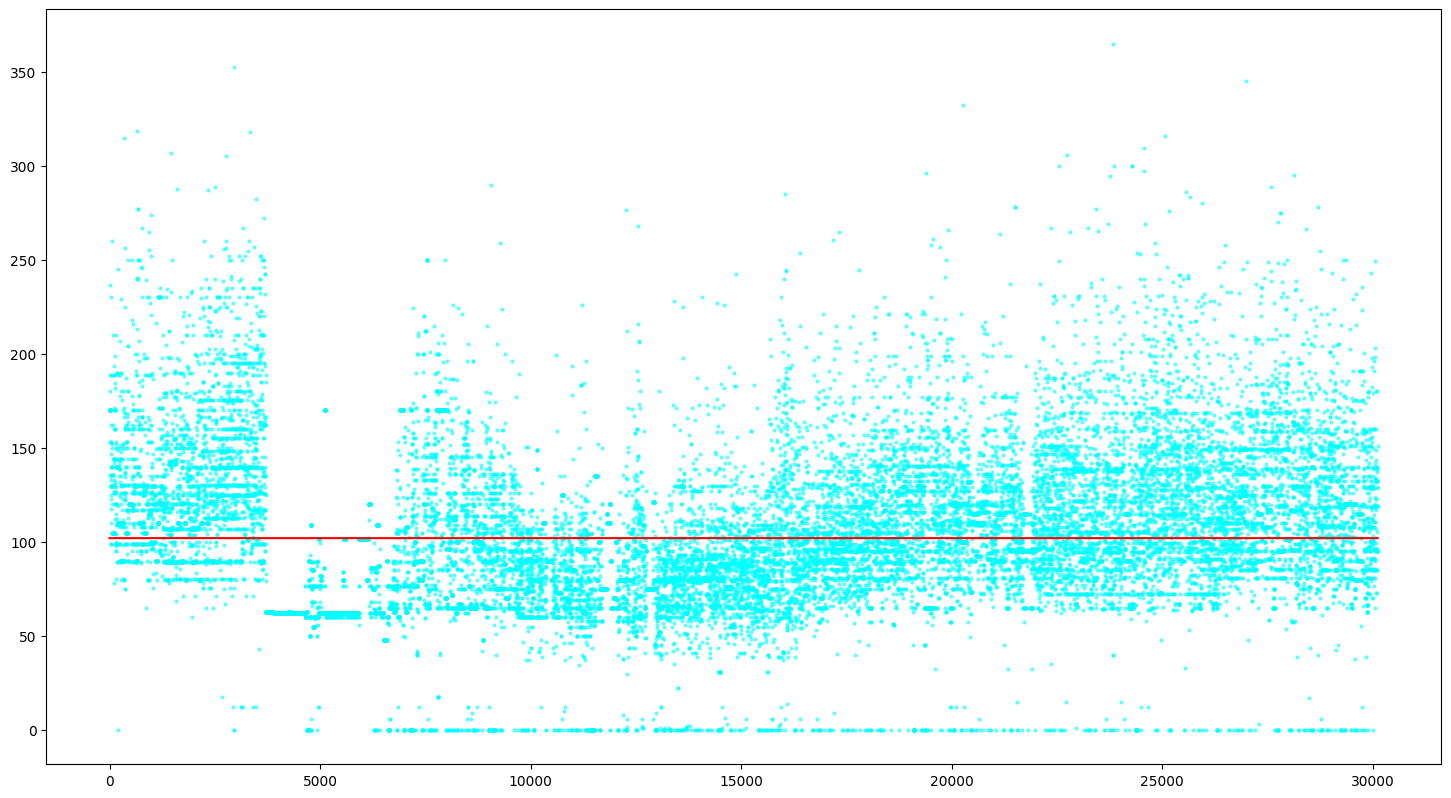

In [50]:
plt.figure(figsize=(18,10))
len_x = len(data2.iloc[70000:100121].adr)
plt.scatter(range(len_x), data2.iloc[70000:100121].adr, s=4, alpha=0.5, c='cyan')
plt.plot(range(len_x+1), model.predict(70000, 100121), c='red')

## 2. Deep Neural Networks


### With Subset of the data

In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.1


In [9]:
data2 = pd.read_csv('hotel_bookings.csv')
sample_data = data2[data2.adr < 1000].iloc[40000:70000]
mov_avg7 = sample_data.adr.rolling(window=7).mean().iloc[7:]
mov_avg7 = mov_avg7.reset_index(drop=True)

del data2
del sample_data

In [10]:
df = mov_avg7
del mov_avg7
df.head()

0    146.821429
1    151.850000
2    149.135714
3    156.292857
4    150.901429
Name: adr, dtype: float64

In [11]:
df = pd.DataFrame(df)
df.describe()

adr
count  29993.000000
mean     102.027937
std       25.617941
min       10.928571
25%       83.377143
50%      100.000000
75%      118.504286
max      225.000000

array([[<AxesSubplot:title={'center':'adr'}>]], dtype=object)

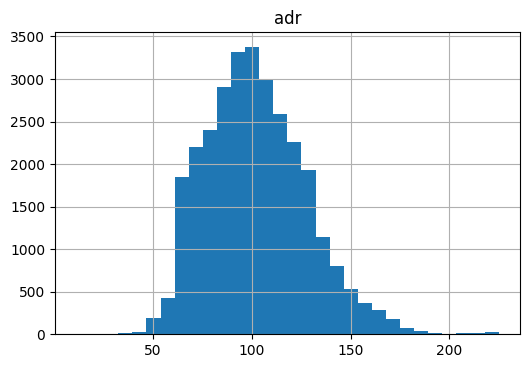

In [55]:
df.hist(bins=30)

<AxesSubplot:>

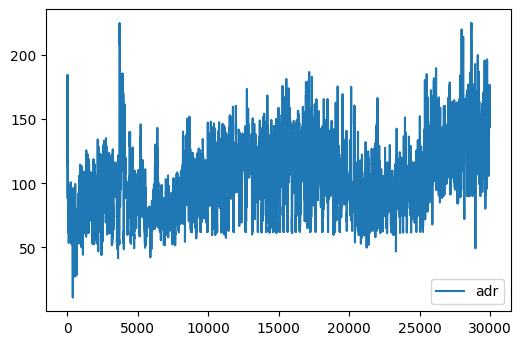

In [57]:
df.plot()

In [12]:
def plot_loss(history):
    epochs = range(1, (len(history.history["loss"])+1))
    losses = history.history["loss"]
    plt.figure(figsize=(8,5))
    plt.plot(epochs, losses)
    plt.title("Loss graph")
    plt.xlabel("epochs")
    plt.ylabel("Loss value")
    plt.grid(True)
    plt.show()
    
split = 23000  
valid_time = df.index[split:]
valid_ADR = df.adr[split:]

train_time = df.index[:split]
train_ADR = df.adr[:split]


In [13]:
window_size = 7
batch_size = 32

def window_dataset(series, window_size, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size+1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size+1))
    dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [14]:
dataset = window_dataset(train_ADR, window_size, batch_size)
valid_dataset = window_dataset(valid_ADR, window_size, batch_size)

Epoch 1/12
719/719 [==============================] - 6s 4ms/step - loss: 90.2717
Epoch 2/12
719/719 [==============================] - 3s 4ms/step - loss: 80.5631
Epoch 3/12
719/719 [==============================] - 3s 4ms/step - loss: 39.2911
Epoch 4/12
719/719 [==============================] - 3s 5ms/step - loss: 7.8976
Epoch 5/12
719/719 [==============================] - 3s 5ms/step - loss: 7.9167
Epoch 6/12
719/719 [==============================] - 3s 5ms/step - loss: 7.9886
Epoch 7/12
719/719 [==============================] - 3s 5ms/step - loss: 8.1808
Epoch 8/12
719/719 [==============================] - 3s 4ms/step - loss: 8.7262
Epoch 9/12
719/719 [==============================] - 3s 4ms/step - loss: 16.2204
Epoch 10/12
719/719 [==============================] - 3s 4ms/step - loss: 75.7028
Epoch 11/12
719/719 [==============================] - 3s 5ms/step - loss: 51.3983: 0s - loss:
Epoch 12/12
719/719 [==============================] - 3s 5ms/step - loss: 17.1113


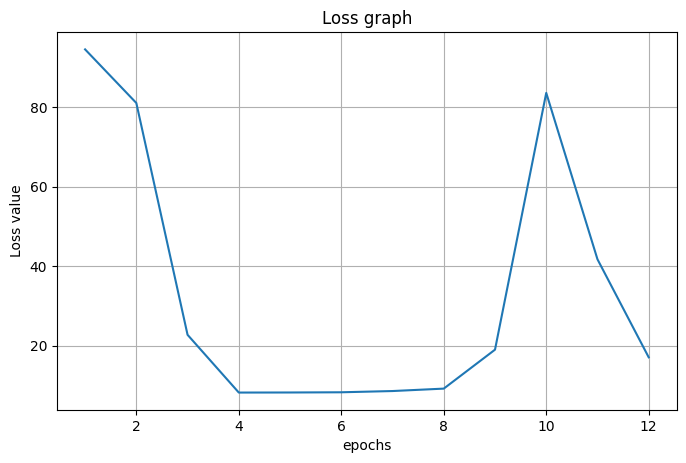

In [61]:
model = tf.keras.models.Sequential([
#     tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(30)),
    tf.keras.layers.Dense(30, activation='relu',input_shape = [None,1]),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1)
#     tf.keras.layers.Lambda(lambda x: x * 100.0)
                                  
])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-7 * 10**(epoch/2))

model.compile(loss=tf.keras.losses.Huber(), optimizer= tf.keras.optimizers.SGD(lr = 1e-4,momentum = 0.9))
history = model.fit(dataset, epochs=12, callbacks=[lr_scheduler])
plot_loss(history)


(1e-08, 0.1, 5.0, 70.0)

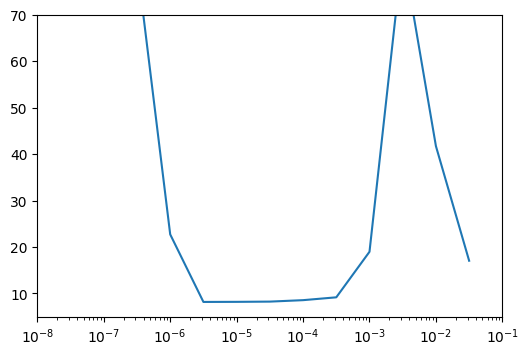

In [62]:
plt.semilogx(history.history['lr'],history.history['loss'])
plt.axis([1e-8, 1e-1,5, 70])

Epoch 1/5
719/719 [==============================] - 4s 5ms/step - loss: 32.7700
Epoch 2/5
719/719 [==============================] - 3s 4ms/step - loss: 7.9663
Epoch 3/5
719/719 [==============================] - 3s 4ms/step - loss: 7.9648
Epoch 4/5
719/719 [==============================] - 3s 4ms/step - loss: 8.0087
Epoch 5/5
719/719 [==============================] - 3s 4ms/step - loss: 8.0125


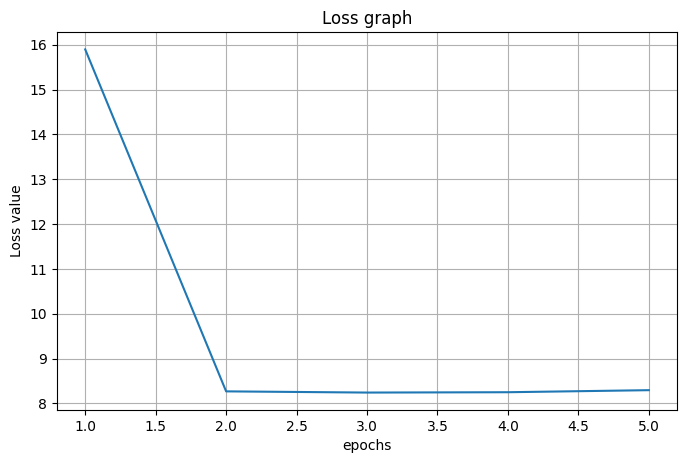

In [63]:
model = tf.keras.models.Sequential([
#     tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(30)),
    tf.keras.layers.Dense(30, activation='relu',input_shape = [None,1]),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1)
#     tf.keras.layers.Lambda(lambda x: x * 100.0)
                                  
])


model.compile(loss=tf.keras.losses.Huber(), optimizer= tf.keras.optimizers.SGD(lr = 5*1e-5,momentum = 0.9))
history = model.fit(dataset, epochs=5)
plot_loss(history)

[ 62.770496  78.86626   99.2799   ... 106.53864  149.94026  115.95347 ]


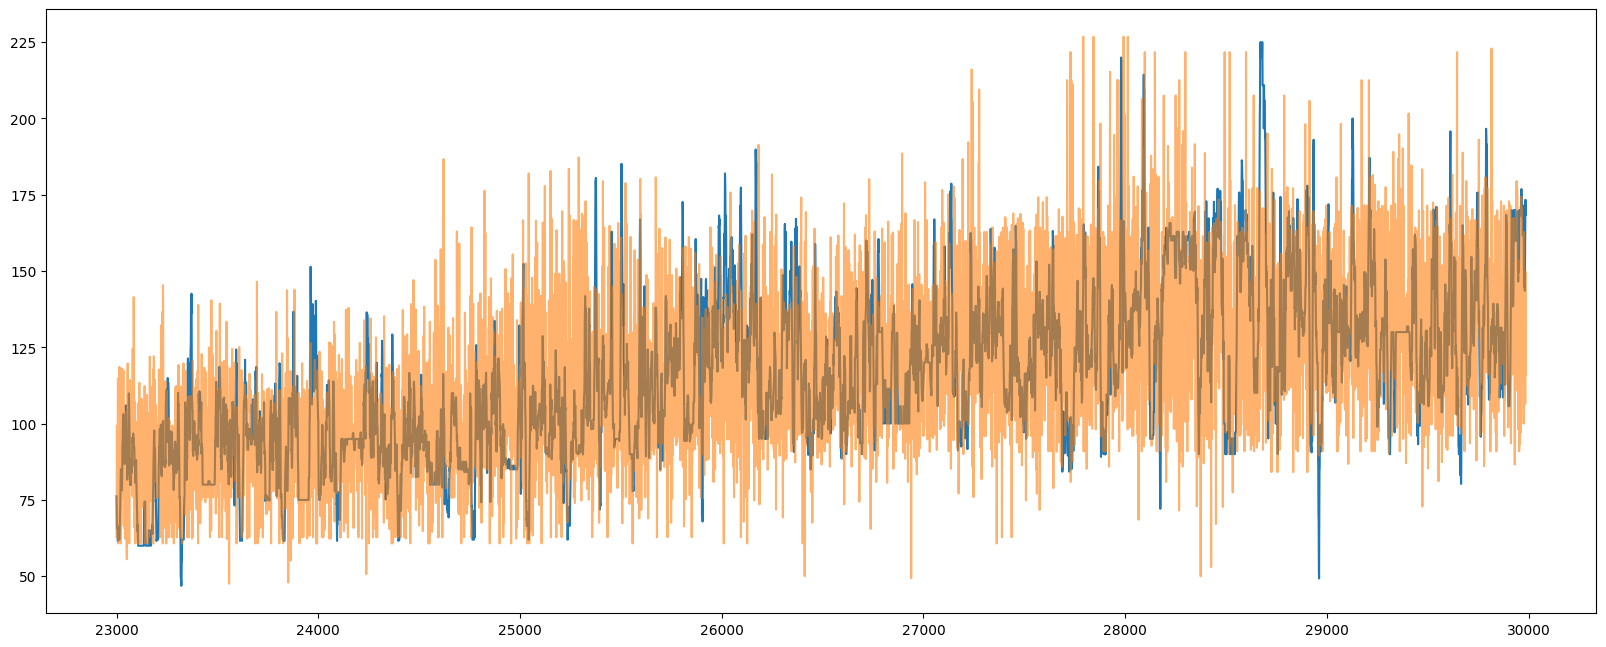

In [64]:
prediction = model.predict(valid_dataset)
print(prediction[:,0,0])

plt.figure(figsize=(20,8))
plt.plot(valid_time[:-7], valid_ADR[:-7])
plt.plot(valid_time[:-7], prediction[:,0,0], alpha=0.6)
plt.show()

In [65]:
pred = pd.Series(prediction[:,0,0])

In [73]:
pred_avg7 = pred.rolling(window=3).mean().iloc[3:]

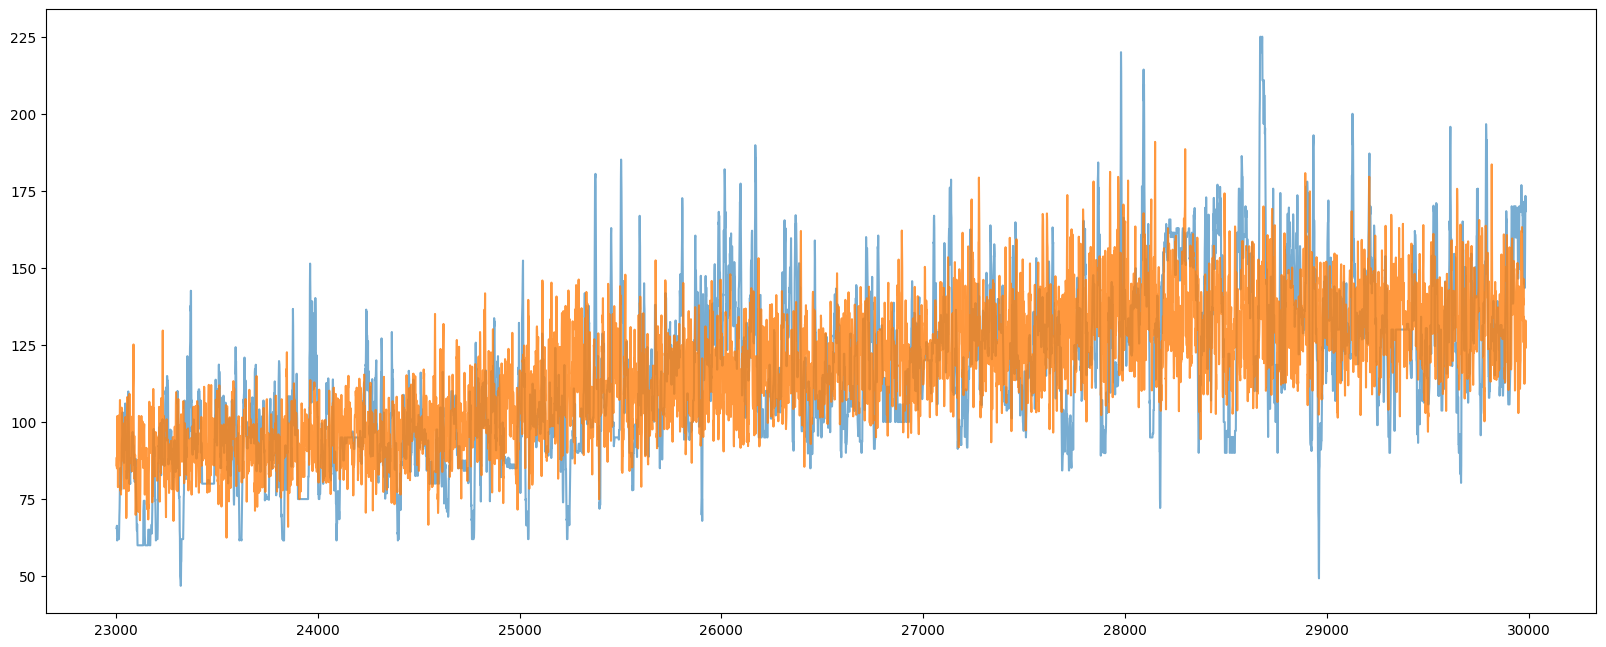

In [74]:
plt.figure(figsize=(20,8))
plt.plot(valid_time[3:-7], valid_ADR[3:-7], alpha=0.6)
plt.plot(valid_time[3:-7], pred_avg7, alpha=0.8)
plt.show()

---

### With complete data

In [75]:
data2 = pd.read_csv('hotel_bookings.csv')
cleaned_data = data2[data2.adr < 1000]
del data2
mov_avg7 = cleaned_data.adr.rolling(window=7).mean().iloc[7:]
mov_avg7 = mov_avg7.reset_index(drop=True)

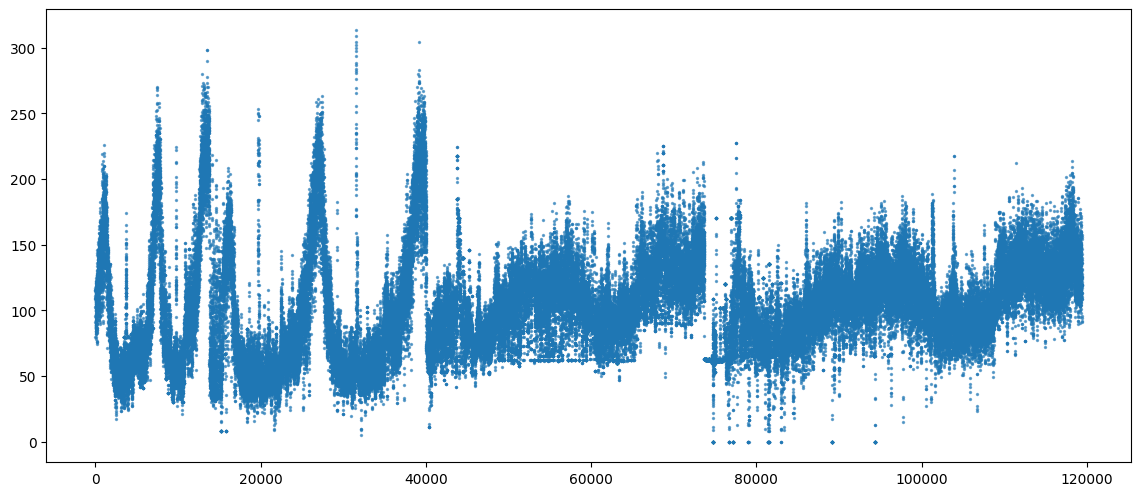

In [77]:
plt.figure(figsize=(14,6))
plt.scatter(mov_avg7.index, mov_avg7, s=2, alpha=0.6)

In [78]:
df = pd.DataFrame(mov_avg7)
    
split = 100000  
valid_time = df.index[split:]
valid_ADR = df.adr[split:]

train_time = df.index[:split]
train_ADR = df.adr[:split]

In [79]:
dataset = window_dataset(train_ADR, window_size, batch_size)
valid_dataset = window_dataset(valid_ADR, window_size, batch_size)

Epoch 1/5
3125/3125 [==============================] - 14s 4ms/step - loss: 41.7137
Epoch 2/5
3125/3125 [==============================] - 14s 4ms/step - loss: 10.5682
Epoch 3/5
3125/3125 [==============================] - 13s 4ms/step - loss: 10.5700
Epoch 4/5
3125/3125 [==============================] - 13s 4ms/step - loss: 10.5678
Epoch 5/5
3125/3125 [==============================] - 13s 4ms/step - loss: 10.5627


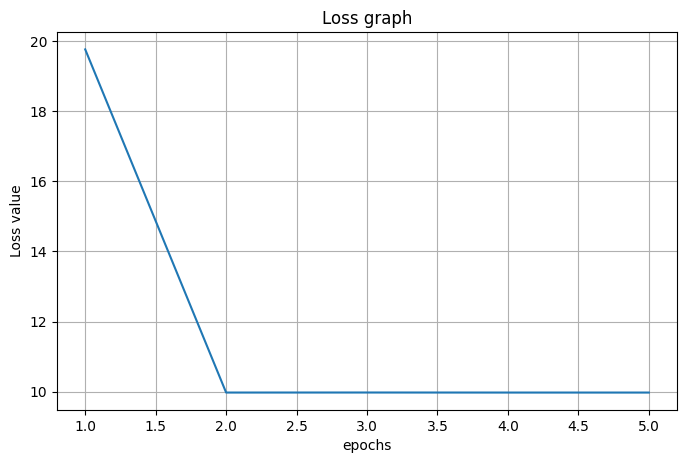

In [80]:
model = tf.keras.models.Sequential([
#     tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(30)),
    tf.keras.layers.Dense(30, activation='relu',input_shape = [None,1]),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1)
#     tf.keras.layers.Lambda(lambda x: x * 100.0)
                                  
])


model.compile(loss=tf.keras.losses.Huber(), optimizer= tf.keras.optimizers.SGD(lr = 1e-6,momentum = 0.9))
history = model.fit(dataset, epochs=5)
plot_loss(history)

[106.82288 110.65144 125.88911 ... 111.44521 106.02911 138.68732]


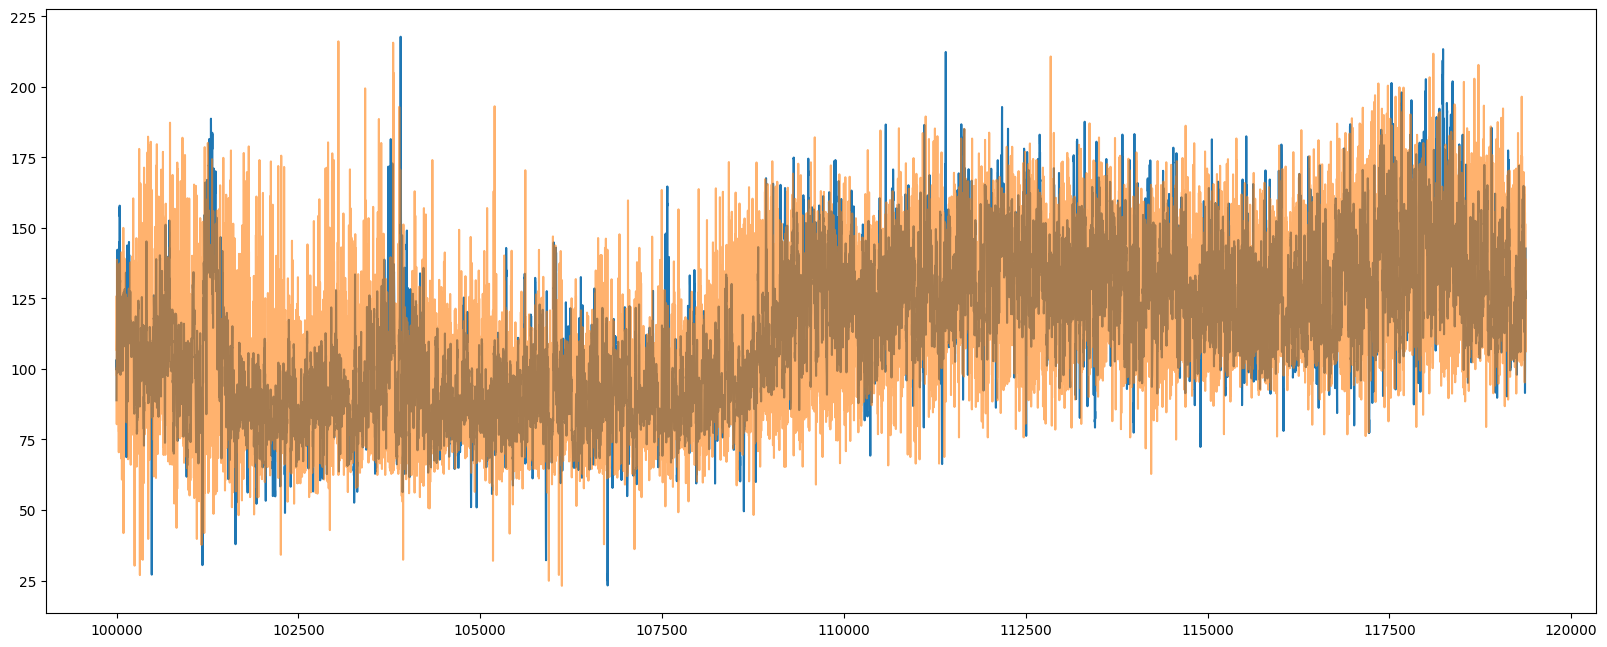

In [81]:
prediction = model.predict(valid_dataset)
print(prediction[:,0,0])

plt.figure(figsize=(20,8))
plt.plot(valid_time[:-window_size], valid_ADR[:-window_size])
plt.plot(valid_time[:-window_size], prediction[:,0,0], alpha=0.6)
plt.show()

### Average of predictions with sliding window of size: 2

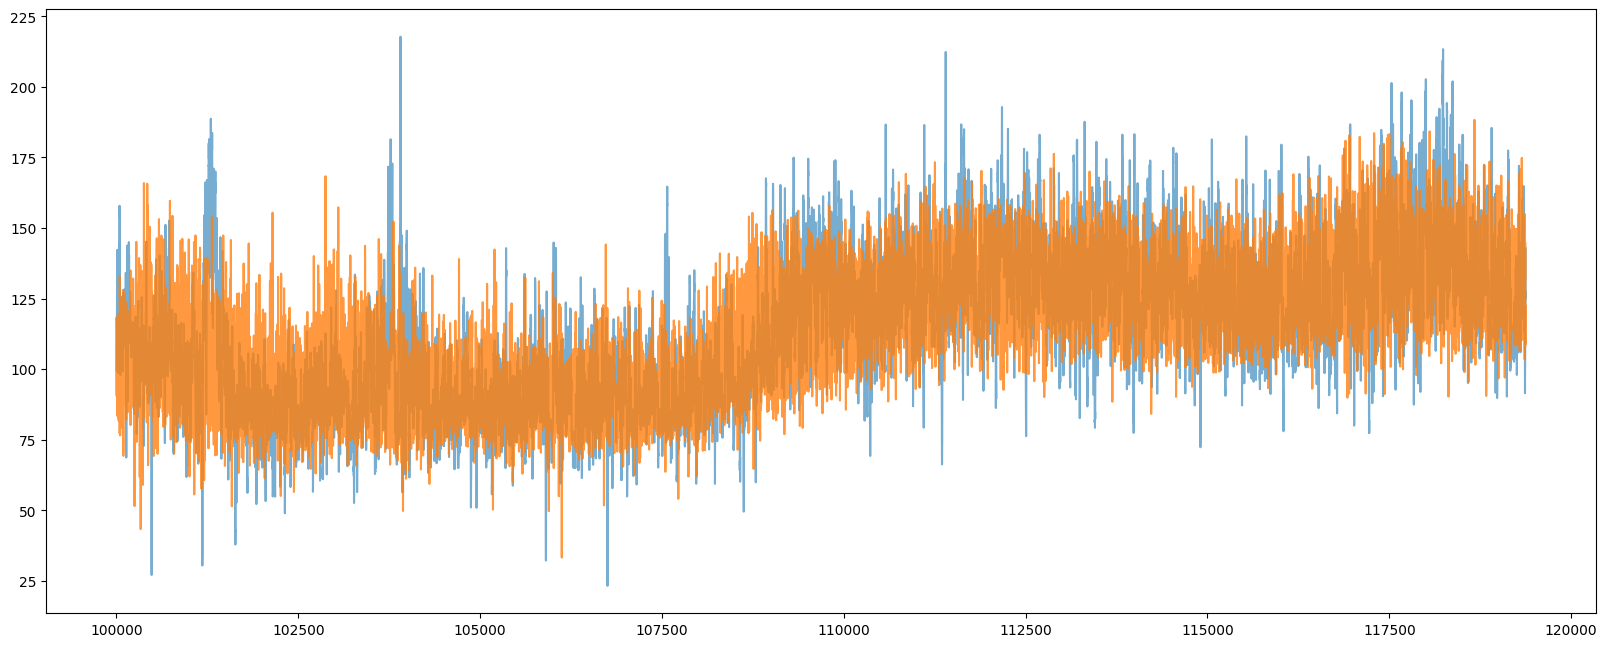

In [82]:
pred = pd.Series(prediction[:,0,0])
pred_avg7 = pred.rolling(window=2).mean().iloc[2:]
plt.figure(figsize=(20,8))
plt.plot(valid_time[2:-7], valid_ADR[2:-7], alpha=0.6)
plt.plot(valid_time[2:-7], pred_avg7, alpha=0.8)
plt.show()

In [83]:
## Window size
print("Mean: ",(valid_ADR[2:-7].to_numpy() - pred_avg7).mean())
print("Median: ",(valid_ADR[2:-7].to_numpy() - pred_avg7).median())
print("Mode: ",(valid_ADR[2:-7].to_numpy() - pred_avg7).mode())

Mean:  0.8414872048043387
Median:  -0.03423747471400418
Mode:  0   -5.19009
dtype: float64


### Residual Plot

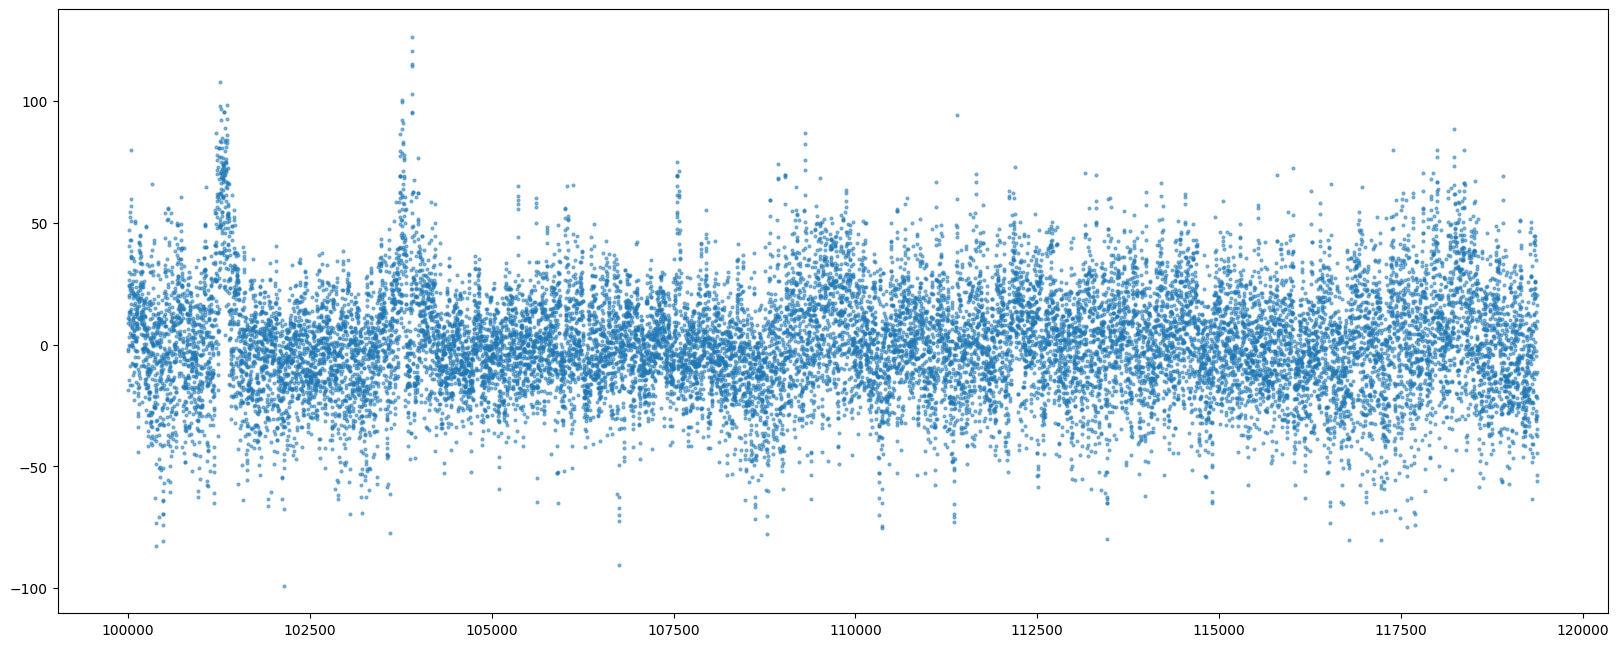

In [84]:
plt.figure(figsize=(20,8))
plt.scatter(valid_time[2:-7], (valid_ADR[2:-7].to_numpy() - pred_avg7), s=4, alpha=0.5)

In [74]:
model.save("Dnn")

INFO:tensorflow:Assets written to: Dnn\assets


In [80]:
model1 = tf.keras.models.load_model('Dnn')

## 3. Sequential Model

### 3.1. Recurrent Neural Network

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data2 = pd.read_csv('hotel_bookings.csv')
sample_data = data2[data2.adr < 1000].iloc[40000:70000]
mov_avg7 = sample_data.adr.rolling(window=7).mean().iloc[7:]
mov_avg7 = mov_avg7.reset_index(drop=True)

del data2
del sample_data

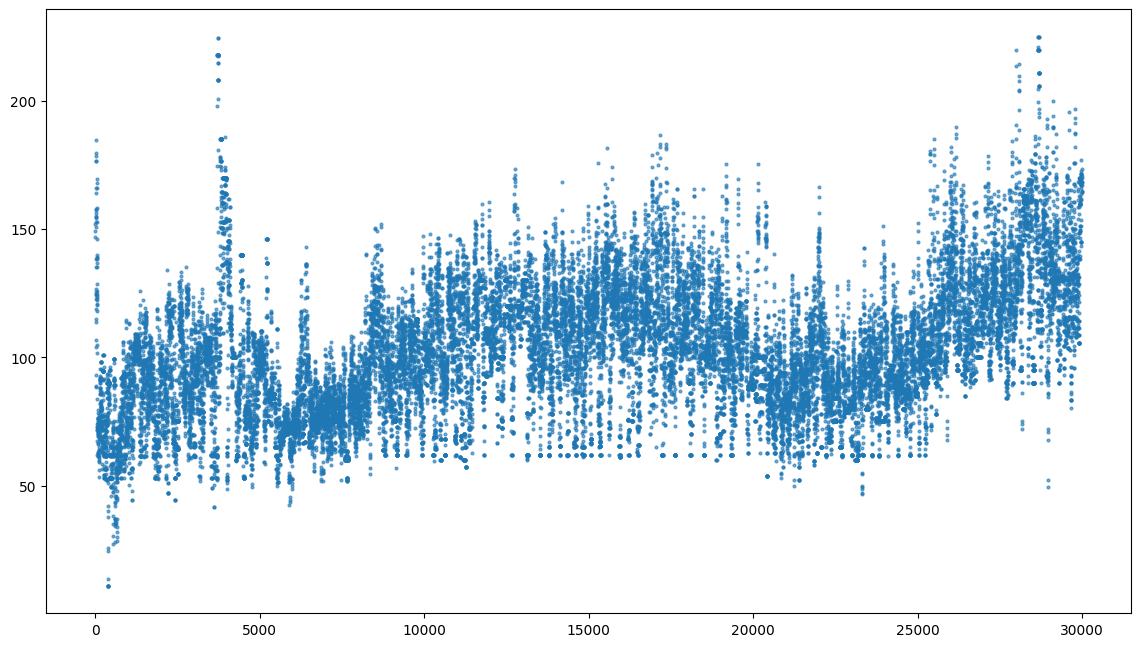

In [18]:
plt.figure(figsize=(14,8))
plt.scatter(mov_avg7.index, mov_avg7, s=4, alpha=0.6)

In [3]:
df = pd.DataFrame(mov_avg7)
del mov_avg7
split = 23000  
valid_time = df.index[split:]
valid_ADR = df.adr[split:]

train_time = df.index[:split]
train_ADR = df.adr[:split]

In [4]:
def plot_loss(history):
    epochs = range(1, (len(history.history["loss"])+1))
    losses = history.history["loss"]
    plt.figure(figsize=(8,5))
    plt.plot(epochs, losses)
    plt.title("Loss graph")
    plt.xlabel("epochs")
    plt.ylabel("Loss value")
    plt.grid(True)
    plt.show()

In [5]:
window_size = 7
batch_size = 32

def window_dataset(series, window_size, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size+1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size+1))
    dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [6]:
dataset = window_dataset(train_ADR, window_size, batch_size)
valid_dataset = window_dataset(valid_ADR, window_size, batch_size)

Epoch 1/12
719/719 [==============================] - 20s 22ms/step - loss: 91.0188
Epoch 2/12
719/719 [==============================] - 16s 22ms/step - loss: 90.9753
Epoch 3/12
719/719 [==============================] - 16s 22ms/step - loss: 90.9870
Epoch 4/12
719/719 [==============================] - 16s 22ms/step - loss: 90.6342
Epoch 5/12
719/719 [==============================] - 15s 21ms/step - loss: 90.0998
Epoch 6/12
719/719 [==============================] - 16s 22ms/step - loss: 88.4445
Epoch 7/12
719/719 [==============================] - 16s 22ms/step - loss: 82.9613
Epoch 8/12
719/719 [==============================] - 16s 22ms/step - loss: 52.1451
Epoch 9/12
719/719 [==============================] - 16s 22ms/step - loss: 9.3987
Epoch 10/12
719/719 [==============================] - 16s 22ms/step - loss: 4.3061
Epoch 11/12
719/719 [==============================] - 16s 22ms/step - loss: 5.0130
Epoch 12/12
719/719 [==============================] - 15s 21ms/step - loss: 

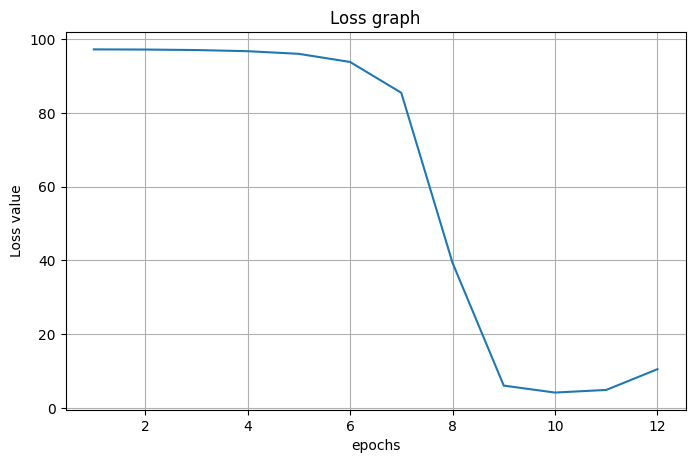

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(30)),
    tf.keras.layers.SimpleRNN(32, return_sequences=True),
    tf.keras.layers.SimpleRNN(32, return_sequences=True),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1)
#     tf.keras.layers.Lambda(lambda x: x * 100.0)
                                  
])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-7 * 10**(epoch/2))

model.compile(loss=tf.keras.losses.Huber(), optimizer= tf.keras.optimizers.Adam(lr = 1e-4))
history = model.fit(dataset, epochs=12, callbacks=[lr_scheduler])
plot_loss(history)


(1e-08, 0.1, 3.0, 100.0)

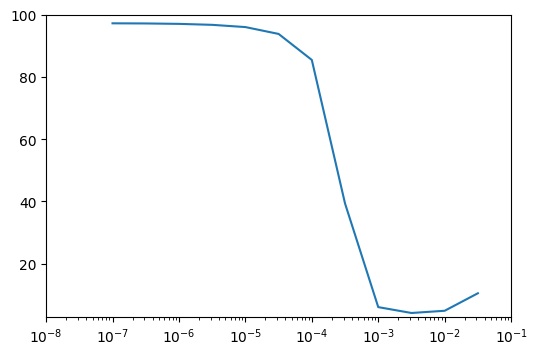

In [24]:
plt.semilogx(history.history['lr'],history.history['loss'])
plt.axis([1e-8, 1e-1,3, 100])

Epoch 1/5
719/719 [==============================] - 23s 27ms/step - loss: 48.2690
Epoch 2/5
719/719 [==============================] - 19s 27ms/step - loss: 14.0326
Epoch 3/5
719/719 [==============================] - 18s 25ms/step - loss: 3.7849 0s 
Epoch 4/5
719/719 [==============================] - 18s 25ms/step - loss: 3.5430
Epoch 5/5
719/719 [==============================] - 18s 25ms/step - loss: 3.4717


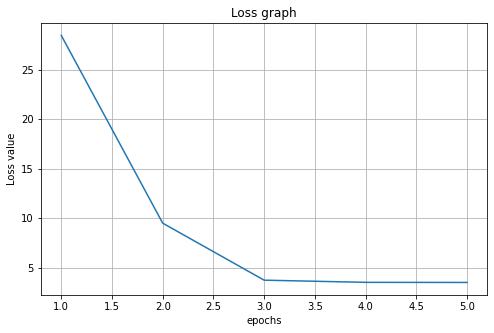

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
    tf.keras.layers.SimpleRNN(32, return_sequences=True),
    tf.keras.layers.SimpleRNN(32, return_sequences=True),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1)
#     tf.keras.layers.Lambda(lambda x: x * 100.0)
                                  
])


model.compile(loss=tf.keras.losses.Huber(), optimizer= tf.keras.optimizers.Adam(lr = 1e-3))
history = model.fit(dataset, epochs=5)
plot_loss(history)

Epoch 1/3
719/719 [==============================] - 21s 25ms/step - loss: 3.2222
Epoch 2/3
719/719 [==============================] - 18s 25ms/step - loss: 3.1536 0s - loss: 3.
Epoch 3/3
719/719 [==============================] - 18s 25ms/step - loss: 3.1587


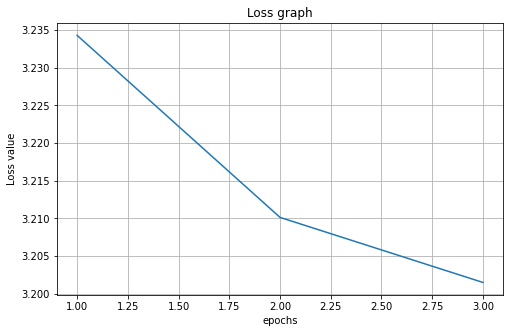

In [8]:
model.compile(loss=tf.keras.losses.Huber(), optimizer= tf.keras.optimizers.Adam(lr=1e-4))
history = model.fit(dataset, epochs=3)
plot_loss(history)

In [103]:
# tf.keras.backend.clear_session()
# model.compile(loss=tf.keras.losses.Huber(), optimizer= tf.keras.optimizers.Adam())
# history = model.fit(dataset, epochs=2)
# plot_loss(history)

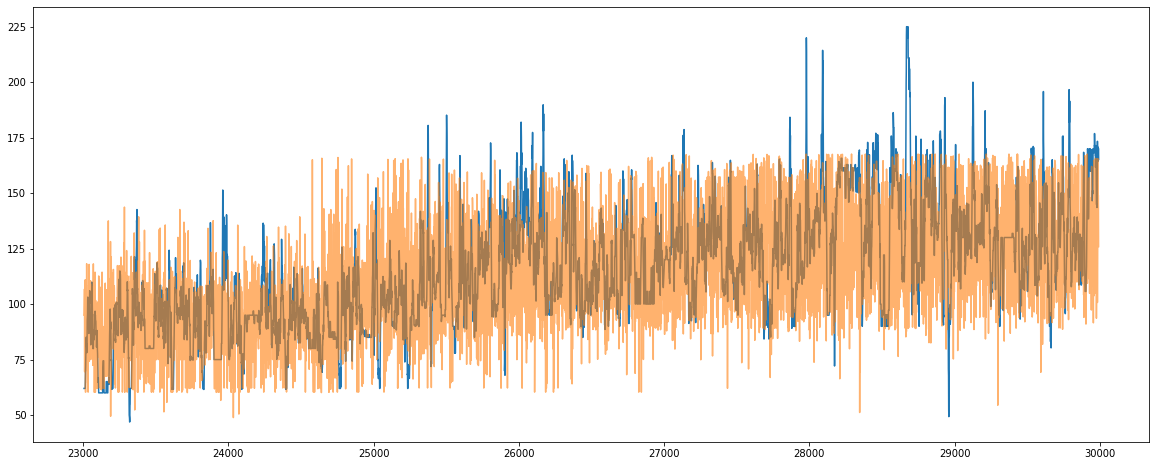

In [41]:
prediction = model.predict(valid_dataset)
plt.figure(figsize=(20,8))
plt.plot(valid_time[window_size:], valid_ADR[window_size:])
plt.plot(valid_time[window_size:], prediction[:,0], alpha=0.6)
plt.show()

In [15]:
prediction[:,0].shape

(6986,)

In [13]:
valid_ADR[7:].shape

(6986,)

In [47]:
print(f'Mean Squared Error: {tf.keras.metrics.mean_squared_error(valid_ADR[7:],prediction[:,0])}')
print(f'Mean Absolute Error: {tf.keras.metrics.mean_absolute_error(valid_ADR[7:],prediction[:,0])}')

Mean Squared Error: 808.9922485351562
Mean Absolute Error: 22.198394775390625


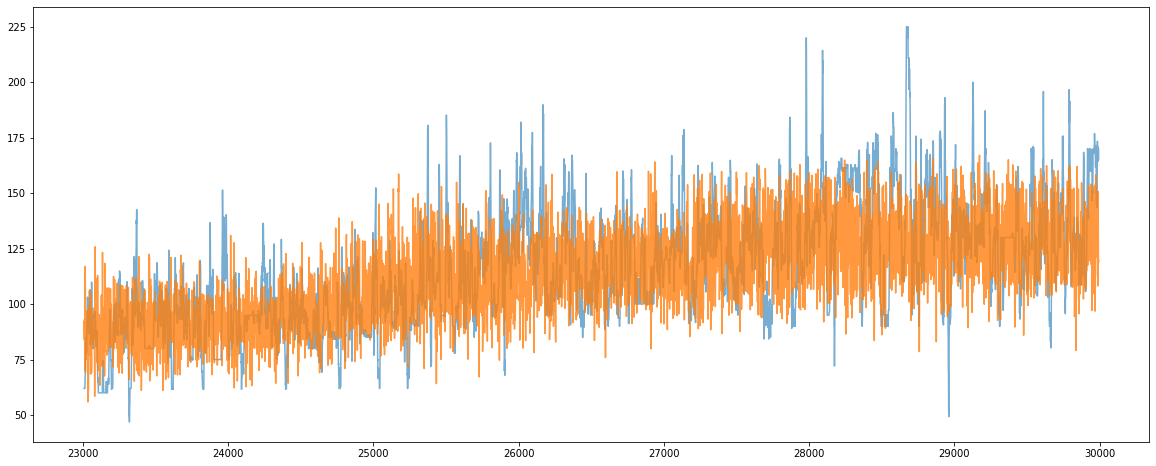

In [39]:
pred = pd.Series(prediction[:,0])
pred_avg7 = pred.rolling(window=2).mean().iloc[2:]
plt.figure(figsize=(20,8))
plt.plot(valid_time[9:], valid_ADR[9:], alpha=0.6)
plt.plot(valid_time[9:], pred_avg7, alpha=0.8)
plt.show()

In [34]:
pred_avg7.shape

(6984,)

In [38]:
print(f'Mean Squared Error: {tf.keras.metrics.mean_squared_error(valid_ADR[9:],pred_avg7)}')
print(f'Mean Absolute Error: {tf.keras.metrics.mean_absolute_error(valid_ADR[9:],pred_avg7)}')

Mean Squared Error: 600.466401494776
Mean Absolute Error: 19.098429450492503


In [45]:
model.evaluate(valid_dataset)

219/219 [==============================] - 2s 7ms/step - loss: 4.4796


4.479644775390625

---

### With Complete Dataset (RNN)

In [76]:
## Complete Data

data2 = pd.read_csv('hotel_bookings.csv')
cleaned_data = data2[data2.adr < 1000]
del data2
mov_avg7 = cleaned_data.adr.rolling(window=7).mean().iloc[7:]
mov_avg7 = mov_avg7.reset_index(drop=True)

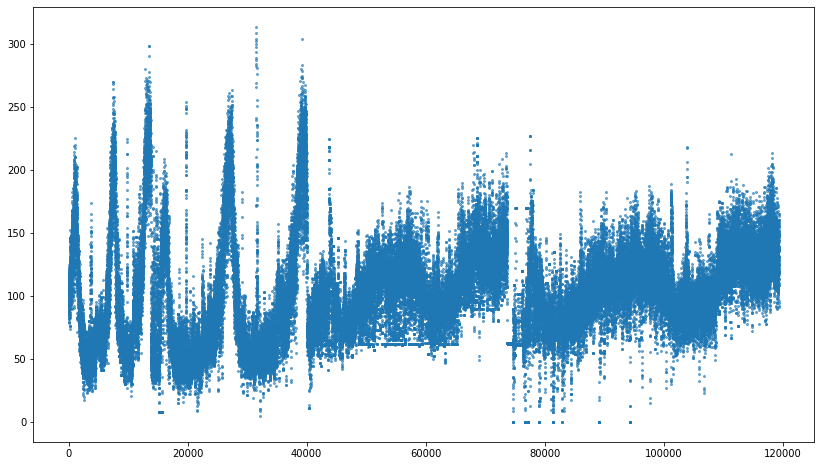

In [77]:
plt.figure(figsize=(14,8))
plt.scatter(mov_avg7.index, mov_avg7, s=4, alpha=0.6)

In [78]:
## Complete Data

df = pd.DataFrame(mov_avg7)
    
split = 100000  
series = df.adr
valid_time = df.index[split:]
valid_ADR = df.adr[split:]

train_time = df.index[:split]
train_ADR = df.adr[:split]

Epoch 1/2
3125/3125 [==============================] - 84s 26ms/step - loss: 33.1096
Epoch 2/2
3125/3125 [==============================] - 79s 25ms/step - loss: 4.6098


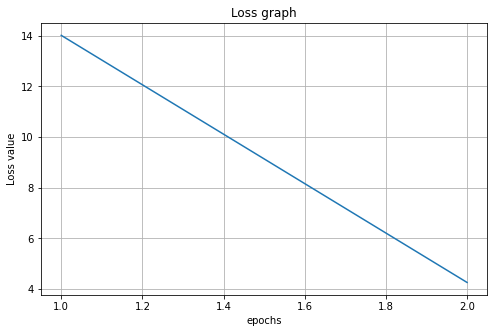

In [79]:
dataset = window_dataset(train_ADR, window_size, batch_size)
valid_dataset = window_dataset(valid_ADR, window_size, batch_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
    tf.keras.layers.SimpleRNN(32, return_sequences=True),
    tf.keras.layers.SimpleRNN(32, return_sequences=True),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1)
#     tf.keras.layers.Lambda(lambda x: x * 100.0)
                                  
])


model.compile(loss=tf.keras.losses.Huber(), optimizer= tf.keras.optimizers.Adam(lr = 1e-3))
history = model.fit(dataset, epochs=2)
plot_loss(history)

Epoch 1/2
3125/3125 [==============================] - 86s 27ms/step - loss: 4.2853
Epoch 2/2
3125/3125 [==============================] - 98s 31ms/step - loss: 4.2122


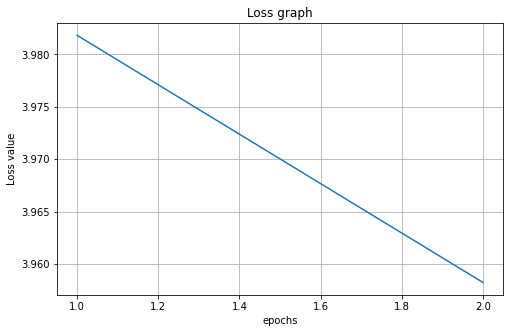

In [80]:
model.compile(loss=tf.keras.losses.Huber(), optimizer= tf.keras.optimizers.Adam(lr=1e-4))
history = model.fit(dataset, epochs=2)
plot_loss(history)

<br>

#### Prediction:

In [84]:
prediction = model.predict(valid_dataset)


Mean Squared Error: 669.349853515625
Mean Absolute Error: 19.88674545288086



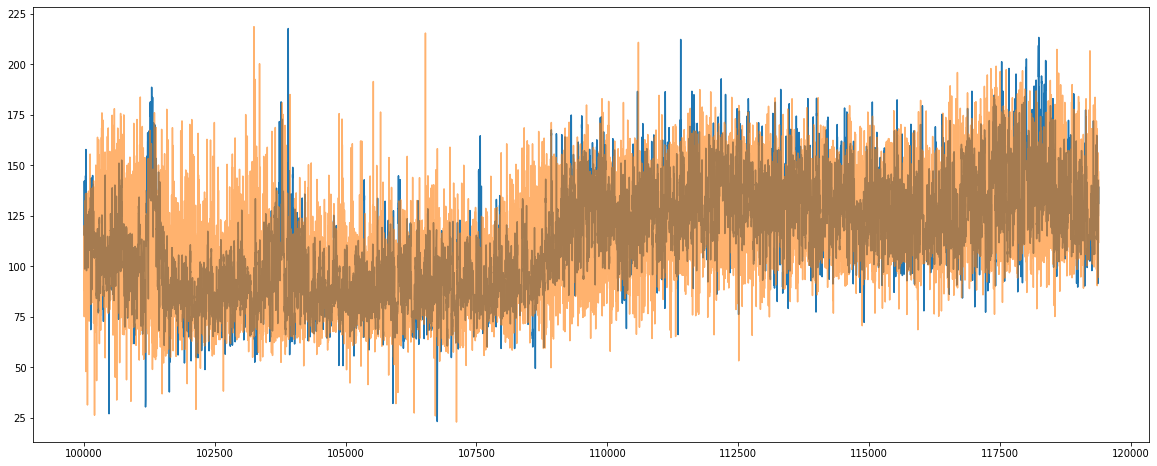

In [87]:
print(f'\nMean Squared Error: {tf.keras.metrics.mean_squared_error(valid_ADR[window_size:],prediction[:,0])}')
print(f'Mean Absolute Error: {tf.keras.metrics.mean_absolute_error(valid_ADR[window_size:],prediction[:,0])}\n')
plt.figure(figsize=(20,8))
plt.plot(valid_time[window_size:], valid_ADR[window_size:])
plt.plot(valid_time[window_size:], prediction[:,0], alpha=0.6)
plt.show()

<br>

#### Windowed Moving Average Smoothning for better Presentation
<br> <i>Window Size: 2</i>


Mean Squared Error: 503.2793697628985
Mean Absolute Error: 17.260976570030323



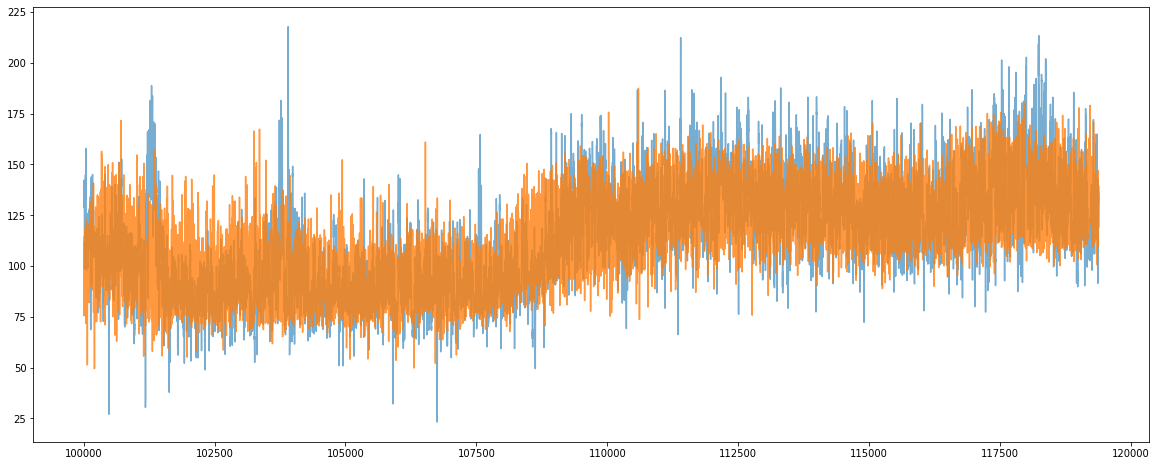

In [88]:
pred = pd.Series(prediction[:,0])
pred_avg7 = pred.rolling(window=2).mean().iloc[2:]
print(f'\nMean Squared Error: {tf.keras.metrics.mean_squared_error(valid_ADR[9:],pred_avg7)}')
print(f'Mean Absolute Error: {tf.keras.metrics.mean_absolute_error(valid_ADR[9:],pred_avg7)}\n')
plt.figure(figsize=(20,8))
plt.plot(valid_time[window_size+2:], valid_ADR[window_size+2:], alpha=0.6)
plt.plot(valid_time[window_size+2:], pred_avg7, alpha=0.8)
plt.show()

In [89]:
model.evaluate(valid_dataset)

606/606 [==============================] - 4s 7ms/step - loss: 4.7291


4.729092597961426

---

### 3.2. LSTM Network

Epoch 1/12
3125/3125 [==============================] - 59s 15ms/step - loss: 95.9051
Epoch 2/12
3125/3125 [==============================] - 49s 16ms/step - loss: 95.8439
Epoch 3/12
3125/3125 [==============================] - 48s 15ms/step - loss: 95.6661
Epoch 4/12
3125/3125 [==============================] - 48s 15ms/step - loss: 94.8462
Epoch 5/12
3125/3125 [==============================] - 48s 15ms/step - loss: 89.7133
Epoch 6/12
3125/3125 [==============================] - 48s 15ms/step - loss: 75.4462
Epoch 7/12
3125/3125 [==============================] - 49s 15ms/step - loss: 38.4464
Epoch 8/12
3125/3125 [==============================] - 55s 17ms/step - loss: 8.5880
Epoch 9/12
3125/3125 [==============================] - 51s 16ms/step - loss: 5.1122
Epoch 10/12
3125/3125 [==============================] - 54s 17ms/step - loss: 5.2250
Epoch 11/12
3125/3125 [==============================] - 53s 17ms/step - loss: 6.0459
Epoch 12/12
3125/3125 [==============================] -

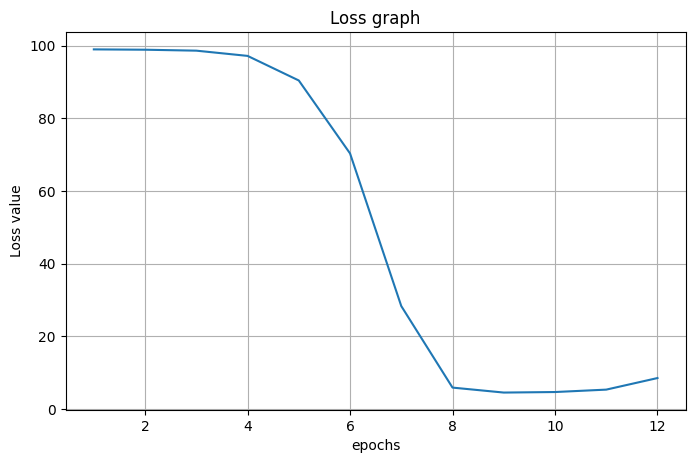

In [132]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences= True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),

    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1)
#     tf.keras.layers.Lambda(lambda x: x * 100.0)
                                  
])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-7 * 10**(epoch/2))

model.compile(loss=tf.keras.losses.Huber(), optimizer= tf.keras.optimizers.Adam(lr = 1e-4))
history = model.fit(dataset, epochs=12, callbacks=[lr_scheduler])
plot_loss(history)

(1e-08, 0.1, 3.0, 100.0)

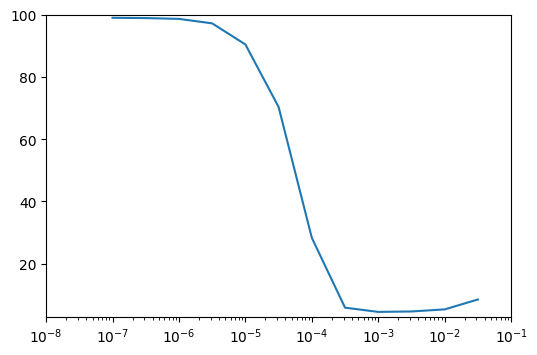

In [133]:
plt.semilogx(history.history['lr'],history.history['loss'])
plt.axis([1e-8, 1e-1,3, 100])

Epoch 1/5
719/719 [==============================] - 30s 19ms/step - loss: 59.1074
Epoch 2/5
719/719 [==============================] - 14s 19ms/step - loss: 12.7796
Epoch 3/5
719/719 [==============================] - 14s 20ms/step - loss: 3.9041 0s - loss: 3.
Epoch 4/5
719/719 [==============================] - 14s 20ms/step - loss: 3.4310
Epoch 5/5
719/719 [==============================] - 14s 19ms/step - loss: 3.3495


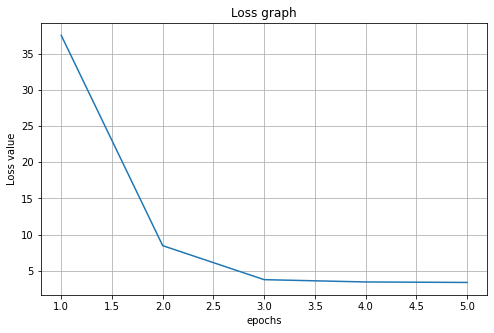

In [48]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences= True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1)
#     tf.keras.layers.Lambda(lambda x: x * 100.0)
                                  
])


model.compile(loss=tf.keras.losses.Huber(), optimizer= tf.keras.optimizers.Adam(lr = 5e-4))
history = model.fit(dataset, epochs=5)
plot_loss(history)

Epoch 1/5
719/719 [==============================] - 27s 19ms/step - loss: 3.1765
Epoch 2/5
719/719 [==============================] - 13s 18ms/step - loss: 3.1394
Epoch 3/5
719/719 [==============================] - 13s 18ms/step - loss: 3.1017
Epoch 4/5
719/719 [==============================] - 13s 18ms/step - loss: 3.1008
Epoch 5/5
719/719 [==============================] - 14s 19ms/step - loss: 3.1220


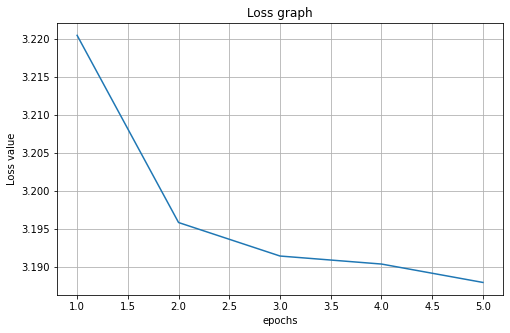

In [49]:
model.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.Adam(lr=5e-5))
history = model.fit(dataset, epochs=5)
plot_loss(history)

In [50]:
prediction = model.predict(valid_dataset)

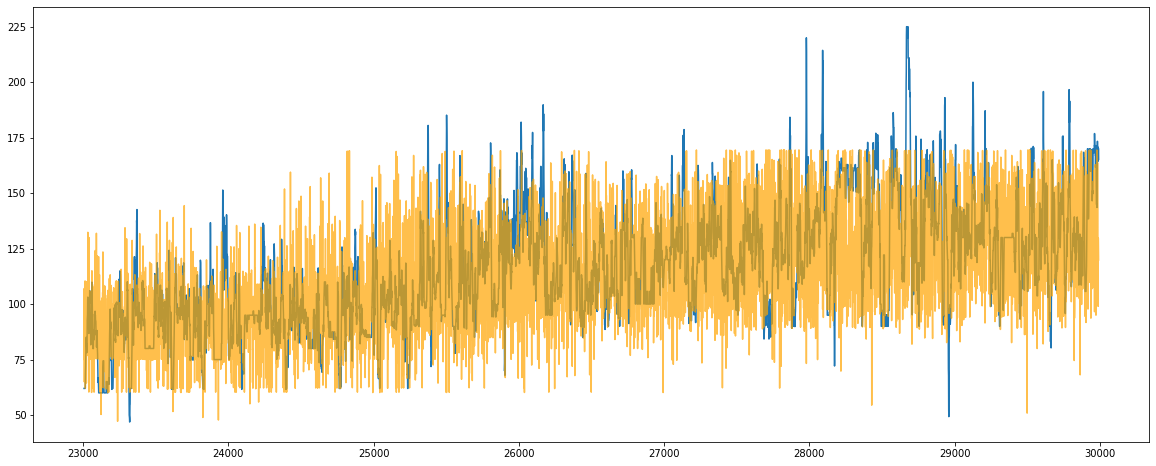

In [63]:
plt.figure(figsize=(20,8))
plt.plot(valid_time[window_size:], valid_ADR[window_size:])
plt.plot(valid_time[window_size:], prediction[:,0], alpha=0.7, c='orange')
plt.show()

In [64]:
print(f'Mean Squared Error: {tf.keras.metrics.mean_squared_error(valid_ADR[7:],prediction[:,0])}')
print(f'Mean Absolute Error: {tf.keras.metrics.mean_absolute_error(valid_ADR[7:],prediction[:,0])}')

Mean Squared Error: 800.5513916015625
Mean Absolute Error: 22.27399253845215


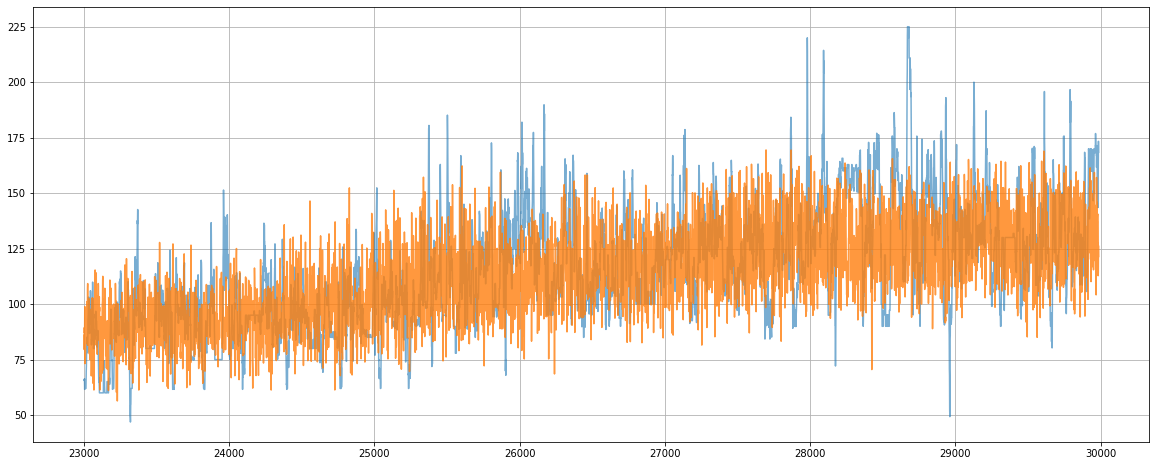

In [65]:
pred = pd.Series(prediction[:,0])
pred_avg7 = pred.rolling(window=2).mean().iloc[2:]
plt.figure(figsize=(20,8))
plt.plot(valid_time[2:-7], valid_ADR[2:-7], alpha=0.6)
plt.plot(valid_time[2:-7], pred_avg7, alpha=0.8)
plt.grid()
plt.show()

In [67]:
print(f'Mean Squared Error: {tf.keras.metrics.mean_squared_error(valid_ADR[9:],pred_avg7)}')
print(f'Mean Absolute Error: {tf.keras.metrics.mean_absolute_error(valid_ADR[9:],pred_avg7)}')

Mean Squared Error: 620.2124039897992
Mean Absolute Error: 19.454777264299302


In [68]:
model.evaluate(valid_dataset)

219/219 [==============================] - 5s 8ms/step - loss: 4.4350


4.434974670410156

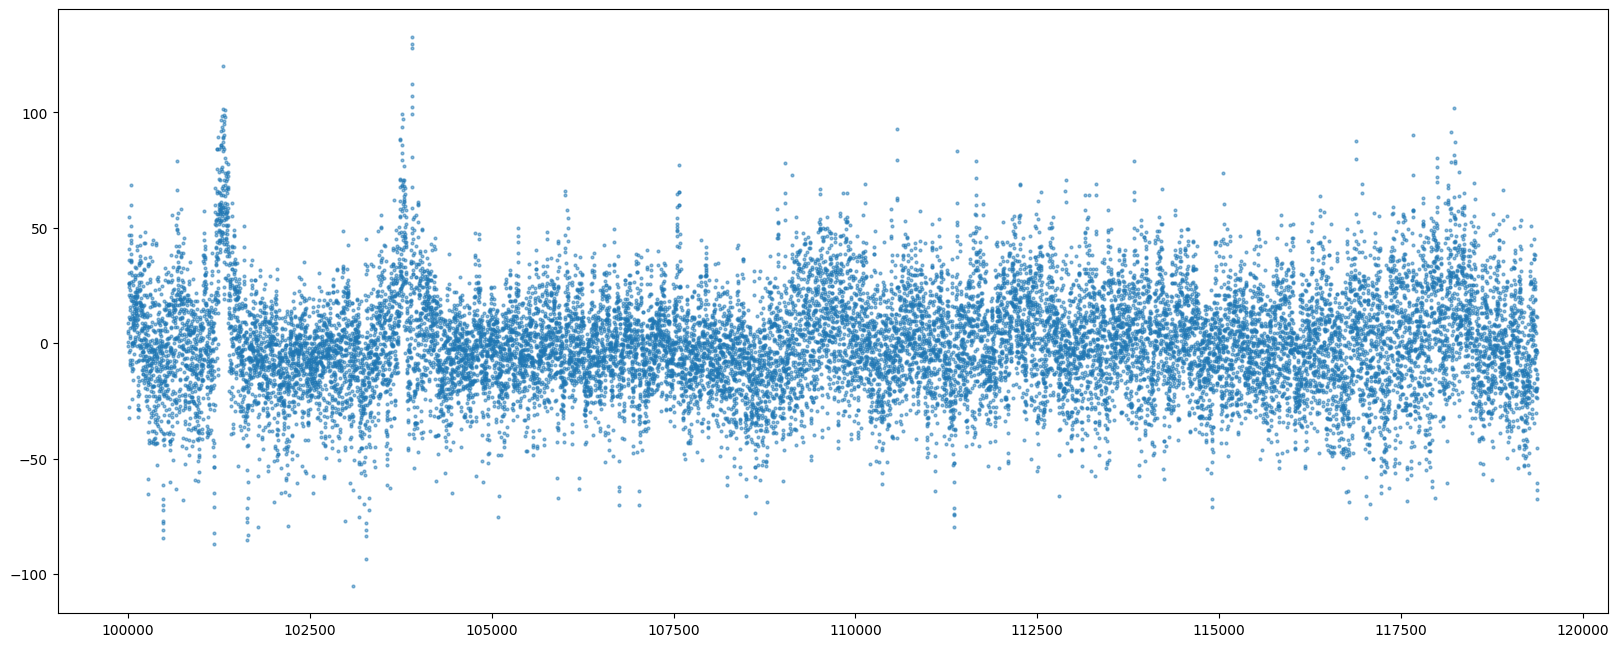

In [144]:
plt.figure(figsize=(20,8))
plt.scatter(valid_time[2:-7], (valid_ADR[2:-7].to_numpy() - pred_avg7), s=4, alpha=0.5)

---

### With Complete Dataset (LSTM)

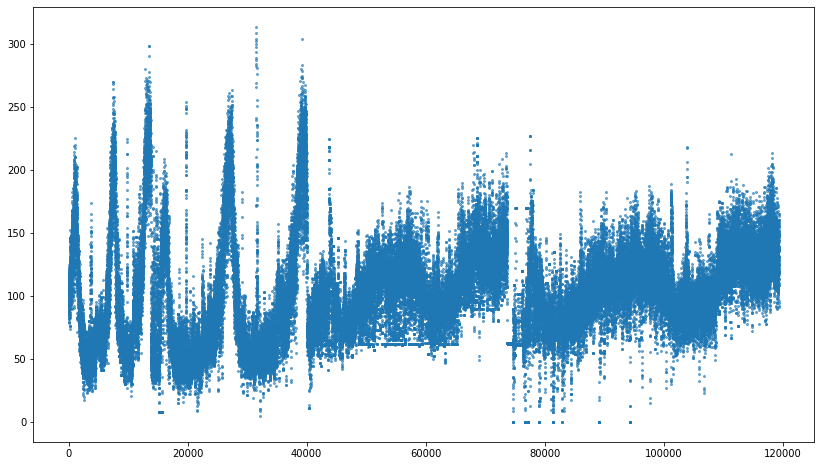

In [69]:
## Complete Data

data2 = pd.read_csv('hotel_bookings.csv')
cleaned_data = data2[data2.adr < 1000]
del data2
mov_avg7 = cleaned_data.adr.rolling(window=7).mean().iloc[7:]
mov_avg7 = mov_avg7.reset_index(drop=True)
plt.figure(figsize=(14,8))
plt.scatter(mov_avg7.index, mov_avg7, s=4, alpha=0.6)

Epoch 1/5
3125/3125 [==============================] - 79s 21ms/step - loss: 36.4439
Epoch 2/5
3125/3125 [==============================] - 66s 21ms/step - loss: 5.0252
Epoch 3/5
3125/3125 [==============================] - 68s 22ms/step - loss: 4.6017
Epoch 4/5
3125/3125 [==============================] - 68s 22ms/step - loss: 4.4995
Epoch 5/5
3125/3125 [==============================] - 66s 21ms/step - loss: 4.4622


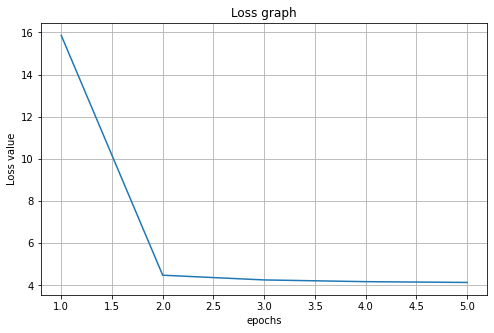

In [70]:
df = pd.DataFrame(mov_avg7)
del mov_avg7
    
split = 100000  
series = df.adr
valid_time = df.index[split:]
valid_ADR = df.adr[split:]

train_time = df.index[:split]
train_ADR = df.adr[:split]
dataset = window_dataset(train_ADR, window_size, batch_size)
valid_dataset = window_dataset(valid_ADR, window_size, batch_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences= True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1)
#     tf.keras.layers.Lambda(lambda x: x * 100.0)
                                  
])


model.compile(loss=tf.keras.losses.Huber(), optimizer= tf.keras.optimizers.Adam(lr = 5e-4))
history = model.fit(dataset, epochs=3)
plot_loss(history)

Epoch 1/2
3125/3125 [==============================] - 90s 22ms/step - loss: 4.2169
Epoch 2/2
3125/3125 [==============================] - 66s 21ms/step - loss: 4.1966TA


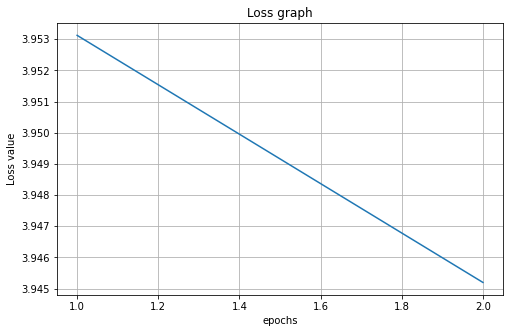

In [71]:
# Fine Tuning with reduced learning rate
model.compile(loss=tf.keras.losses.Huber(), optimizer= tf.keras.optimizers.Adam(lr=5e-5))
history = model.fit(dataset, epochs=2)
plot_loss(history)

#### Prediction


Mean Squared Error: 660.7055053710938
Mean Absolute Error: 19.85607147216797



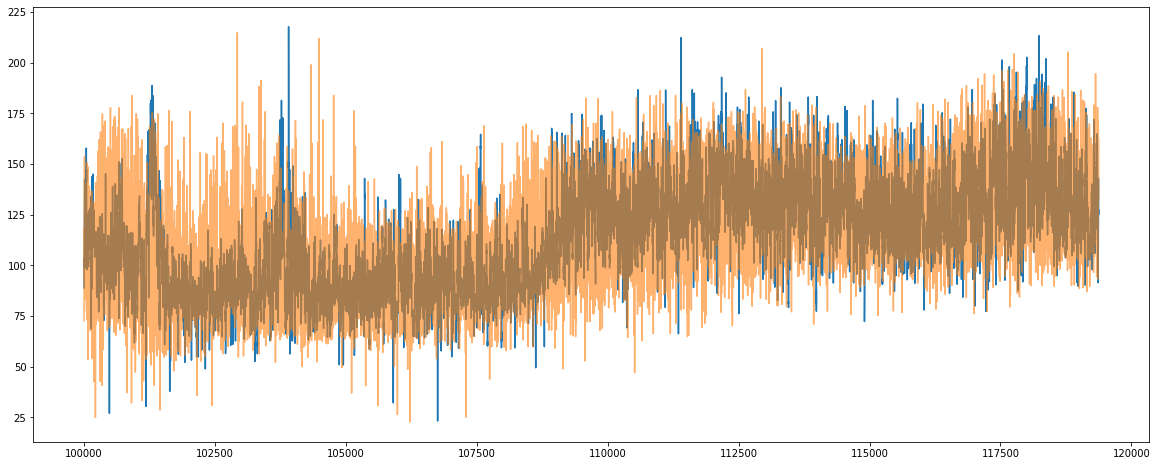

In [72]:
prediction = model.predict(valid_dataset)
print(f'\nMean Squared Error: {tf.keras.metrics.mean_squared_error(valid_ADR[7:],prediction[:,0])}')
print(f'Mean Absolute Error: {tf.keras.metrics.mean_absolute_error(valid_ADR[7:],prediction[:,0])}\n')
plt.figure(figsize=(20,8))
plt.plot(valid_time[:-window_size], valid_ADR[:-window_size])
plt.plot(valid_time[:-window_size], prediction[:,0], alpha=0.6)
plt.show()


Mean Squared Error: 498.876227069111
Mean Absolute Error: 17.221135841324227



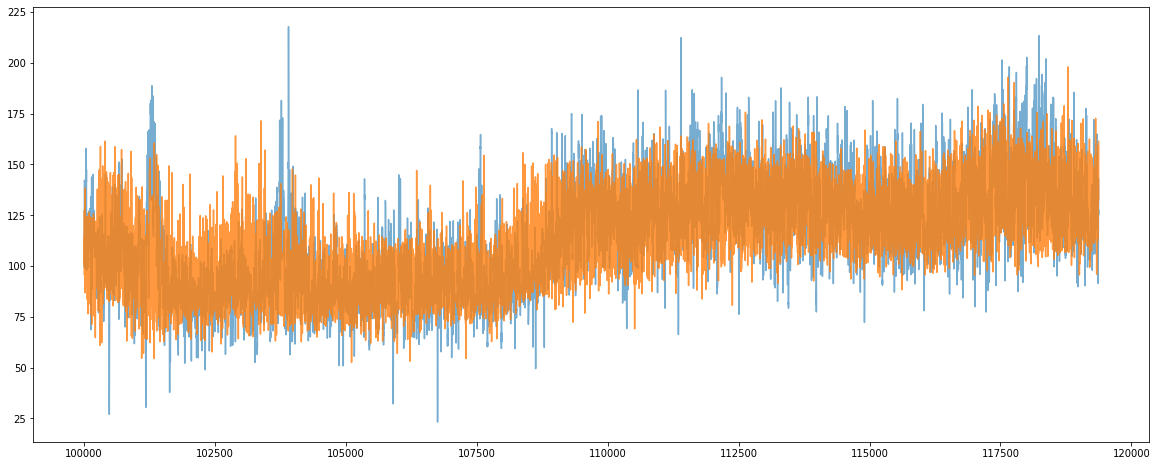

In [74]:
pred = pd.Series(prediction[:,0])
pred_avg7 = pred.rolling(window=2).mean().iloc[2:]
print(f'\nMean Squared Error: {tf.keras.metrics.mean_squared_error(valid_ADR[9:],pred_avg7)}')
print(f'Mean Absolute Error: {tf.keras.metrics.mean_absolute_error(valid_ADR[9:],pred_avg7)}\n')
plt.figure(figsize=(20,8))
plt.plot(valid_time[2:-7], valid_ADR[2:-7], alpha=0.6)
plt.plot(valid_time[2:-7], pred_avg7, alpha=0.8)
plt.show()

In [75]:
model.evaluate(valid_dataset)

606/606 [==============================] - 13s 11ms/step - loss: 4.7188


4.718804359436035

---

### 3.3 Conv + LSTM